In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("Advertising.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

In [55]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
df.shape

(200, 4)

In [57]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


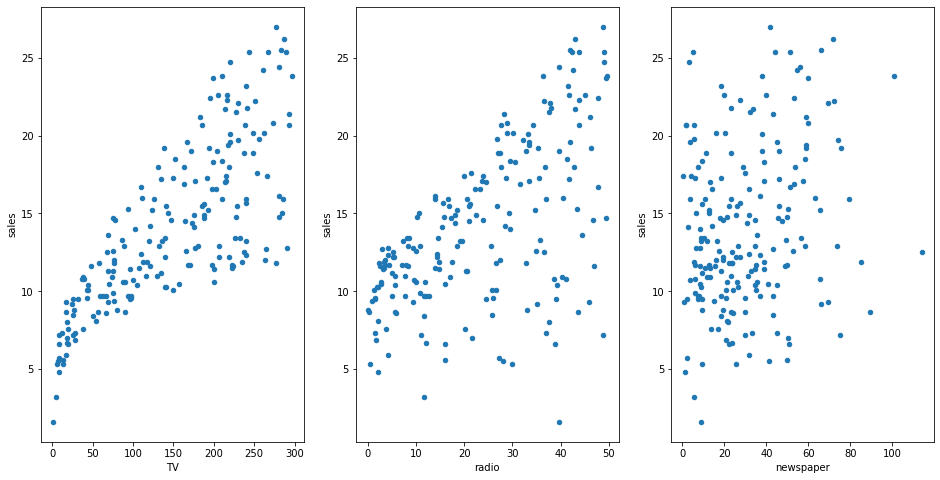

In [59]:
fig, axs = plt.subplots(1, 3)
df.plot(kind = 'scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
df.plot(kind = 'scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind = 'scatter', x='newspaper', y='sales', ax=axs[2]);

In [18]:
features = df[["TV"]]
target = df[["sales"]]
features.shape, target.shape

((200, 1), (200, 1))

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(features, target)

LinearRegression()

In [22]:
lr.coef_

array([[0.04753664]])

In [23]:
lr.intercept_

array([7.03259355])

##### A single unit increase in TV spend will observe 0.0475 unit increase in sales
##### A spend on 1000 on TV will increase 47.5 unit increase in sales
(This is what the coefficient describes)

### Calculate the sales due to a spend of $50,000

Find the slope: y = mx + c => x = 50, c = intercept, m = coefficient

In [25]:
lr.coef_ * 50 + lr.intercept_

array([[9.40942557]])

Spending $50,000 will get the sales figures to 9409 units of TVs

In [26]:
X_new = pd.DataFrame({ 'TV': [df.TV.min(), df.TV.max()] })

In [61]:
predictions = lr.predict(X_new)
predictions

array([[ 7.0658692 ],
       [21.12245377]])

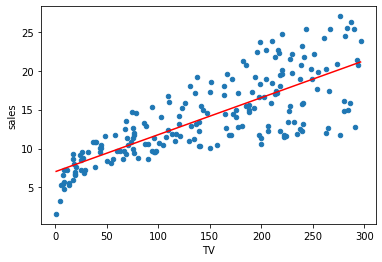

In [62]:
df.plot(kind = 'scatter', x='TV', y='sales')
plt.plot(X_new, predictions, c='red')

In [63]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'sales ~ TV', data = df).fit()
model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [64]:
model.pvalues.loc['TV'] < 0.05

True

In [65]:
model.rsquared

0.611875050850071

### Performing Multiple Linear Regression

In [66]:
features = df[['TV', 'radio', 'newspaper']]
target = df[['sales']]
features.shape, target.shape

((200, 3), (200, 1))

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


As you can see, there are 3 variables for test and 1 variable for test

In [68]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [69]:
mlr_model.coef_

array([[0.04635126, 0.17768722, 0.00031168]])

3 coefficients corresponding to 3 variables (TV, radio, newspaper)

In [70]:
mlr_model.intercept_

array([3.05789279])

1 intercept corresponding to target (sales)

In [71]:
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        07:01:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating accuracy of the model

In [72]:
from sklearn.metrics import mean_squared_error
y_preds = mlr_model.predict(X_test)

#### MSE

In [73]:
mean_squared_error(y_preds, y_test)

2.2171510725419

#### RMSE

In [74]:
import numpy as np
np.sqrt(mean_squared_error(y_preds, y_test))

1.4890100982001095